# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
from wordcloud import WordCloud

In [2]:
# Set plot style
sns.set(style='whitegrid')

In [3]:
steam_df = pd.read_csv(r"C:\Mostafa\Learnning\Steam\DataSets\Raw\steam.csv")
tags_df = pd.read_csv(r"C:\Mostafa\Learnning\Steam\DataSets\Raw\steamspy_tag_data.csv")
reviews_df = pd.read_csv(r"C:\Mostafa\Learnning\Steam\DataSets\Raw\steam_reviews.csv")

In [4]:
print("Steam Dataset:")
display(steam_df.head(3))

Steam Dataset:


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99


In [5]:
print("\nTag Data:")
display(tags_df.head(3))


Tag Data:


,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0


In [6]:
# Basic info
steam_df.info()
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [7]:
# Check for missing values
print("\nMissing in steam.csv:")
print(steam_df.isnull().sum())


Missing in steam.csv:
appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64


Top 10 most common genres

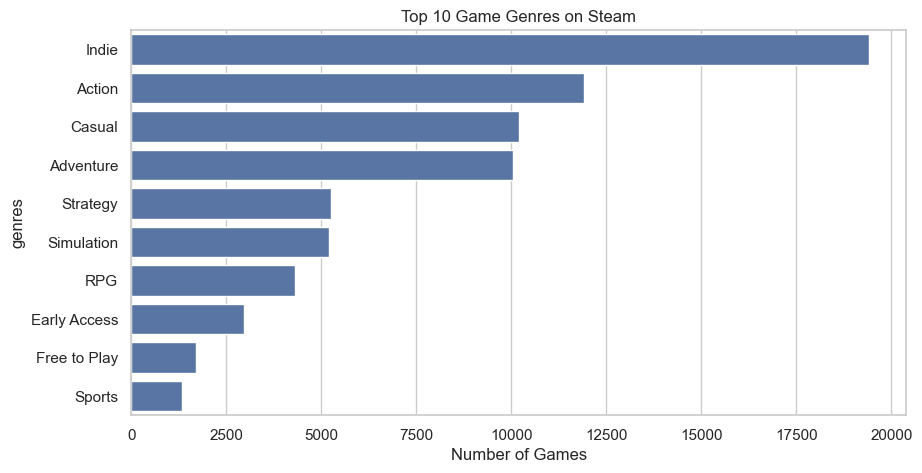

In [8]:
top_genres = steam_df['genres'].dropna().str.split(';').explode().value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Game Genres on Steam')
plt.xlabel('Number of Games')
plt.show()

In [9]:
# Merge datasets on appid
df = pd.merge(steam_df, tags_df, on='appid')

# Drop unnecessary columns (simplify)
df = df[['appid', 'name', 'genres'] + [col for col in tags_df.columns if col != 'appid']]

# Drop rows with missing genres
df = df.dropna(subset=['genres'])

# Preview
df.head(3)

,appid,name,genres,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,Counter-Strike,Action,144,564,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,Team Fortress Classic,Action,0,71,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,Action,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Keep only tag columns
tag_cols = [col for col in df.columns if col not in ['appid', 'name', 'genres']]

# Normalize tag values to 0–1 range
scaler = MinMaxScaler()
tag_matrix = pd.DataFrame(scaler.fit_transform(df[tag_cols]), columns=tag_cols)

# Store the game names for reference
tag_matrix.index = df['name']

tag_matrix.head(3)

,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,4_player_local,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
name,,,,,,,,,,,,,,,,,,,,,
Counter-Strike,0.150943,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.065429
Team Fortress Classic,0.000000,0.125887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
Day of Defeat,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.006702,0.045235,0.0,0.0,0.000000


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between all games
similarity_matrix = cosine_similarity(tag_matrix)

# Convert to DataFrame for easy lookup
content_similarity_df = pd.DataFrame(similarity_matrix, index=tag_matrix.index, columns=tag_matrix.index)

# Preview similarity scores for one game
content_similarity_df['Portal'].sort_values(ascending=False).head(6)

name
Portal                           1.000000
Portal 2                         0.683674
The Turing Test                  0.669663
Quantum Conundrum                0.585453
Twin Sector                      0.564965
Albedo: Eyes from Outer Space    0.552287
Name: Portal, dtype: float64

In [ ]:
content_similarity_df.to_pickle('../models/content_similarity_df.pkl')

In [ ]:
def recommend(game_name, n=5):
    if game_name not in content_similarity_df.index:
        return f"Game '{game_name}' not found in dataset."
    
    # Get similarity scores
    sim_scores = content_similarity_df[game_name]
    
    # Sort scores, exclude the game itself
    top_games = sim_scores.drop(game_name).sort_values(ascending=False).head(n)
    
    return top_games

In [14]:
recommend("Portal", n=5)

name
Portal 2                         0.683674
The Turing Test                  0.669663
Quantum Conundrum                0.585453
Twin Sector                      0.564965
Albedo: Eyes from Outer Space    0.552287
Name: Portal, dtype: float64

Top 15 Most Common Game Genres

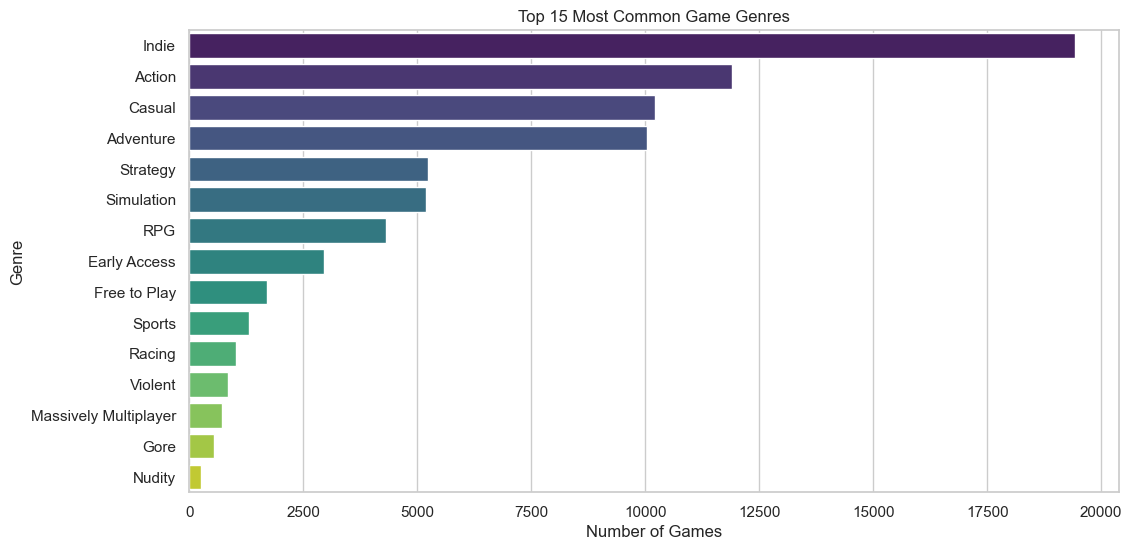

In [15]:
# Extract genres from the main steam_df
genres = steam_df['genres'].str.split(';').explode().value_counts().head(15)

# Plot top 15 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genres.values, y=genres.index, hue=genres.index, dodge=False, palette="viridis", legend=False)
plt.title("Top 15 Most Common Game Genres")
plt.xlabel("Number of Games")
plt.ylabel("Genre")
plt.show()

Most Common Tags on Steam

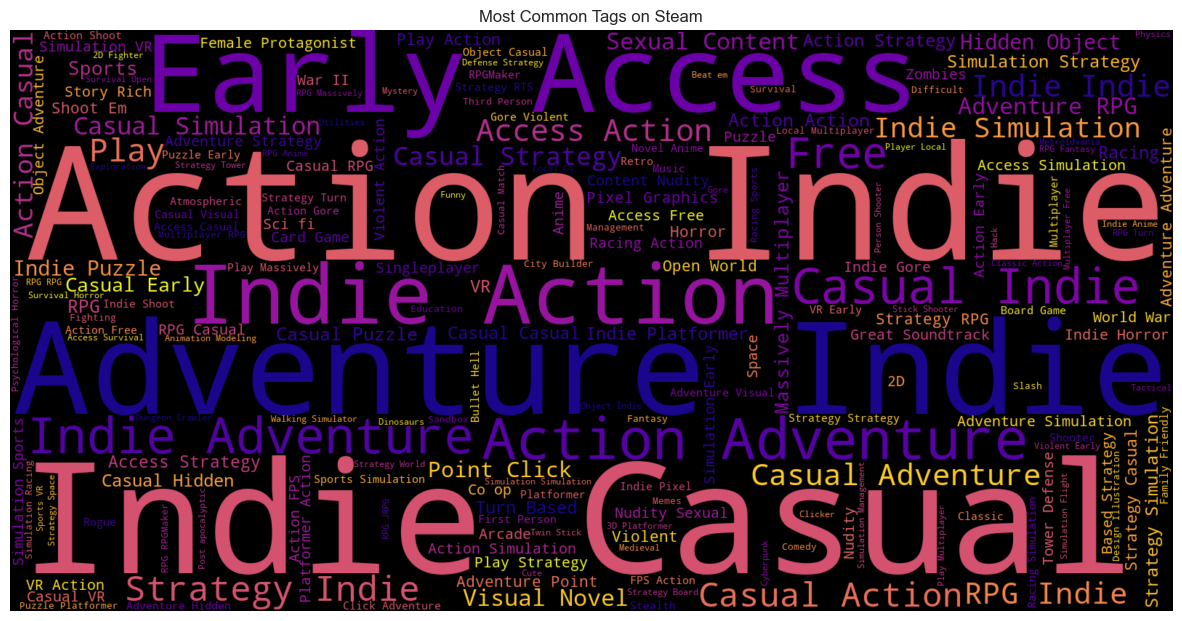

In [16]:
# Create a single large string of all tags
all_tags = steam_df['steamspy_tags'].str.replace(';', ' ').dropna().str.cat(sep=' ')

# Generate word cloud
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(width=1600, height=800, background_color="black", colormap="plasma", 
                      max_words=200, contour_color='white', contour_width=2).generate(all_tags)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Tags on Steam")
plt.show()

Top 20 Most Reviewed Games on Steam

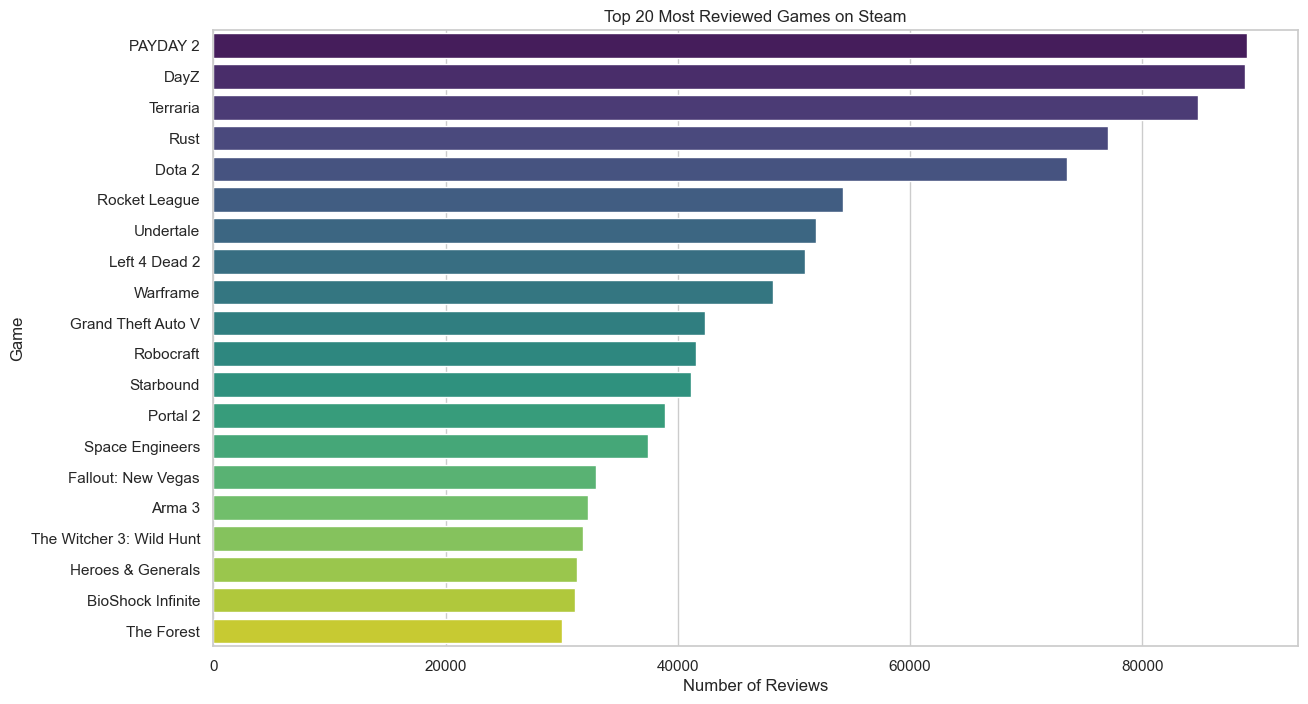

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count most reviewed games
most_reviewed_games = reviews_df['app_name'].value_counts().head(20)

plt.figure(figsize=(14, 8))
sns.barplot(y=most_reviewed_games.index, 
            x=most_reviewed_games.values, 
            hue=most_reviewed_games.index, 
            dodge=False, 
            palette="viridis", 
            legend=False)
plt.title("Top 20 Most Reviewed Games on Steam")
plt.xlabel("Number of Reviews")
plt.ylabel("Game")
plt.show()

Distribution of Review Scores

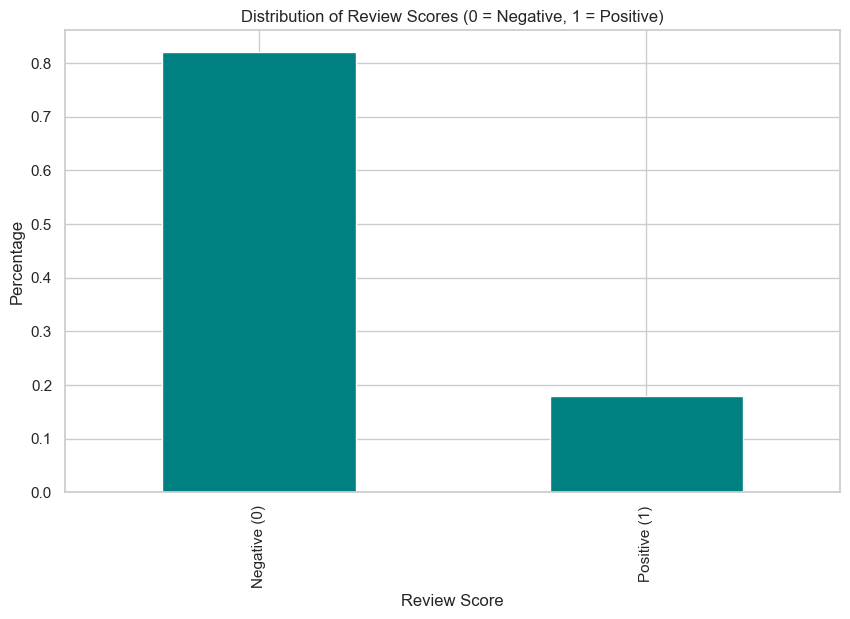

In [18]:
plt.figure(figsize=(10, 6))
reviews_df['review_score'].value_counts(normalize=True).plot(kind='bar', color='teal')
plt.title("Distribution of Review Scores (0 = Negative, 1 = Positive)")
plt.xlabel("Review Score")
plt.ylabel("Percentage")
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
plt.show()


Price vs Average Review Score

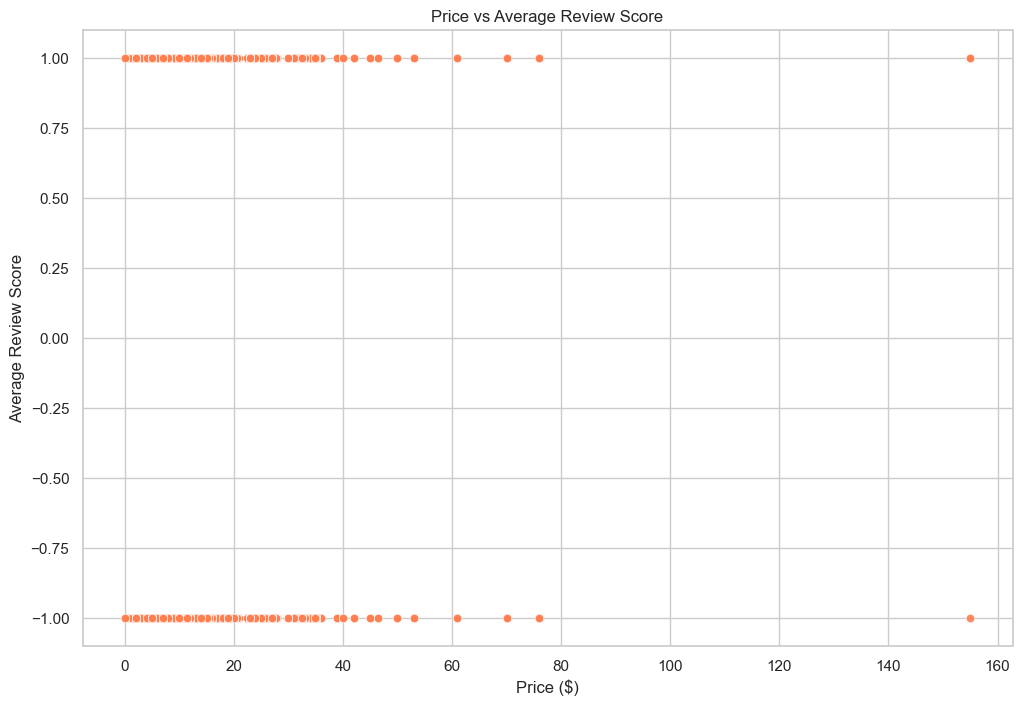

In [19]:
# Merge price info
game_prices = steam_df[['name', 'price']]
merged_df = reviews_df.merge(game_prices, left_on='app_name', right_on='name', how='left')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='review_score', data=merged_df, alpha=0.7, color='coral')
plt.title("Price vs Average Review Score")
plt.xlabel("Price ($)")
plt.ylabel("Average Review Score")
plt.show()


Top 20 Publishers by Game Count

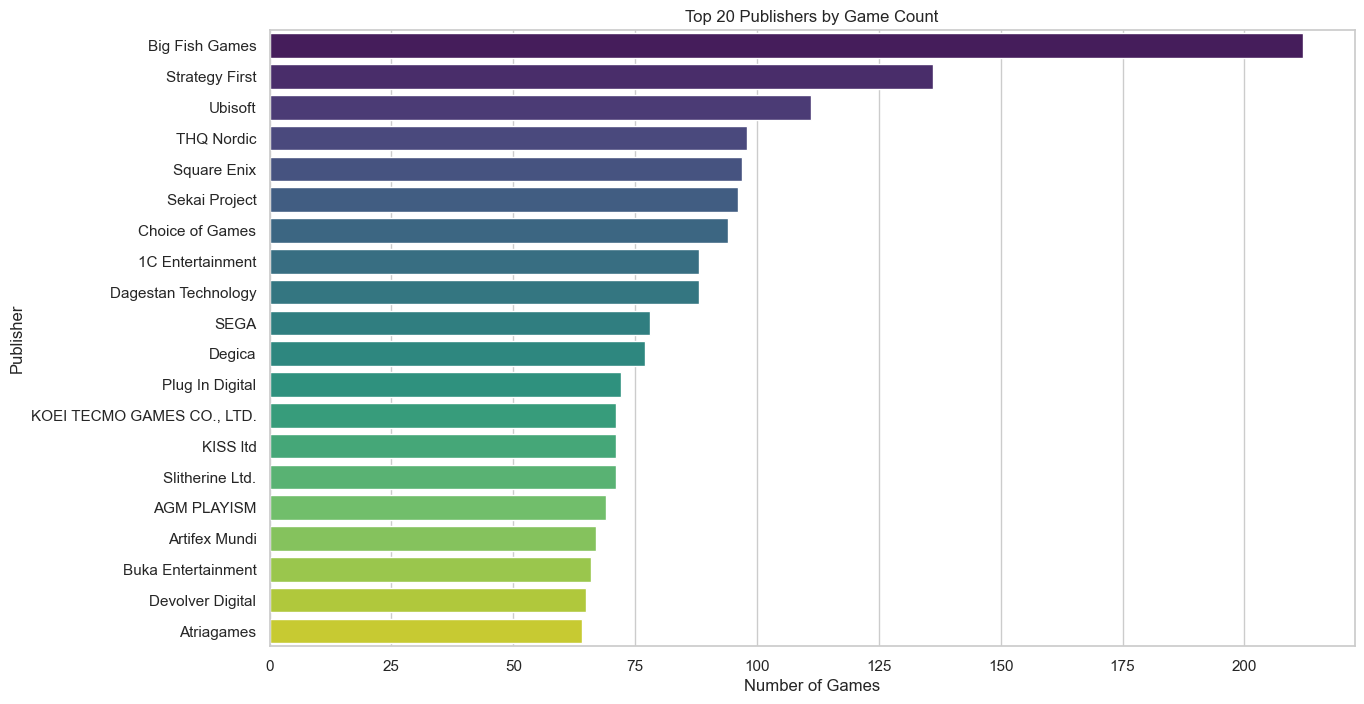

In [20]:
top_publishers = steam_df['publisher'].value_counts().head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_publishers.values, 
            y=top_publishers.index, 
            hue=top_publishers.index, 
            dodge=False, 
            palette="viridis", 
            legend=False)
plt.title("Top 20 Publishers by Game Count")
plt.xlabel("Number of Games")
plt.ylabel("Publisher")
plt.show()